# **Implement the K-Means Clustering algorithm from scratch in Python using Numpy and Pandas and Matplotlib for visualization.**

## **Importing required libraries.**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from collections import Counter

## **Loading the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris Dataset.csv to Iris Dataset.csv


In [ ]:
iris = datasets.load_iris()
print("Dataset loaded successfully")

Dataset loaded successfully


## **Exploratory Data Analysis**- Visualising and data cleaning of CSV

### **Reading Dataset**

In [ ]:
#Creating data frame 
df = pd.DataFrame(iris.data, columns = iris.feature_names)

#To print the first 5 rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Last 5 lines of Dataset
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### **Shape of Data**

In [ ]:
df.shape

(150, 4)

### **Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


From above one can clearly see that there is no null vlues. 

### **Statistical Properties of Dataset**

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Data Visualization**
Heat Map

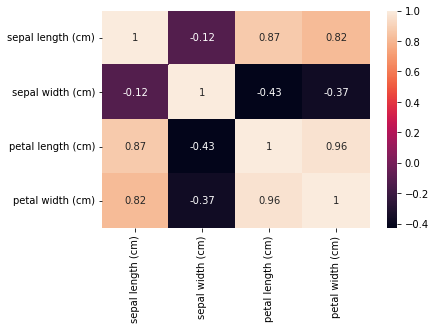

In [ ]:
sns.heatmap(df.corr(), annot = True, linecolor='black')

**Histogram**

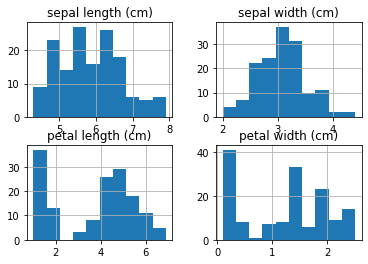

In [ ]:
df.hist()
plt.show()

Split into X and Y

In [ ]:
x= df.iloc[:, :-1]
y= df.iloc[:, -1]

Split into training and testing

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, 
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


Number of samples in training and testing dataset

In [ ]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


Normalise the dataset

In [ ]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
n_x_train= scaler.transform(x_train) # training
n_x_test= scaler.transform(x_test) # testing

**Step-1**

In [ ]:
def distance_ecu(x_train, x_test_point):
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

**Step-2: Find the nearest Neighbours**

In [ ]:
def nearest_neighbors(distance_point, K):
    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest

**Step-3: Classification**

In [ ]:
def voting(df_nearest, y_train):
    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred

**Complete Function**

In [ ]:
def KNN_from_scratch(x_train, y_train, x_test, K):
    y_pred=[] #loop over above 3 steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred  

## **Finding numbers of Clusters for Kmeans**
 We can find this Kmeans Clusters using *elbow* method.

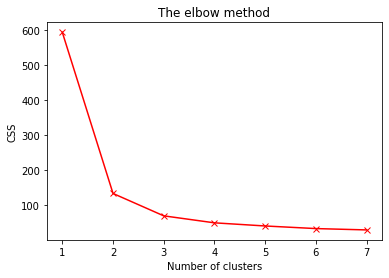

In [ ]:
# Settin the data
x=df.iloc[:,0:3].values

css=[]

# Finding inertia on various k values
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 8), css, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()



The most accurate value for the number of clusters is 3.

**Testing the algorithm**

In [ ]:
K=3
y_pred_scratch= KNN_from_scratch(n_x_train, y_train, n_x_test, K)
print(y_pred_scratch)

[2.3, 1.3, 0.4, 2.1, 0.2, 1.7, 0.1, 1.0, 1.3, 1.4, 2.0, 1.5, 2.3, 1.3, 1.3, 0.3, 1.3, 2.0, 0.1, 0.2, 1.8, 1.8, 0.2, 0.2, 2.3, 0.4, 0.2, 1.2, 1.4, 0.2]


## **Applying KMeans Classifier**

In [ ]:
#Applying Kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

## **Visualizing the Clusters**




In [ ]:
kmeans.cluster_centers_

array([[5.52307692, 2.61538462, 3.91923077],
       [5.24285714, 3.66785714, 1.5       ],
       [6.52727273, 3.04090909, 5.56818182],
       [6.64285714, 3.05      , 4.7       ],
       [7.475     , 3.125     , 6.3       ],
       [4.70454545, 3.12272727, 1.41363636],
       [6.01153846, 2.77307692, 4.8       ]])

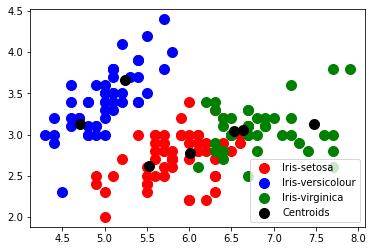

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()